### Aakriti Banjara 
### CE-2020 

In [66]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

# Learning Gradient Descent and its Variants

Gradient descent is one of the most popular and widely used optimization algorithms, and is a first-order optimization algorithm. 
We use gradient descent and calculated the first-order derivative of the loss function with respect to the weights of the network to minimize the loss. It is use to find the minimum of a function. 

In this chapter, we will learn about the following topics:

- Demystifying gradient descent
- Gradient descent versus stochastic gradient descent
- Momentum and Nesterov accelerated gradient
- Adaptive methods of gradient descent


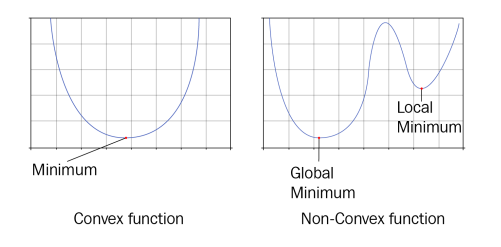

we introduce a new parameter called learning rate, alpha , in the update rule which helps to slow down our gradient steps. 

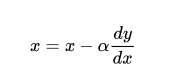 

The following equation is called the parameter update rule or weight update rule:

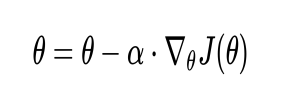 

Here, we have the following:

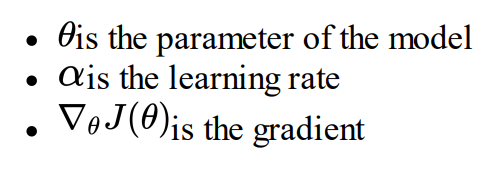

##  Performing gradient descent in regression

We understand how can we use gradient descent in linear regression and find the optimal parameter.

The equation of a simple linear regression can be expressed as follows: 

Y = Mx + b 


### **Preparing the dataset**


In [67]:
data = np.random.randn(500, 2)

In [68]:
# As you can see, our data has two columns: 
print ("array:" , data[0])


array: [ 0.35123366 -0.93555722]


In [69]:
#The first column indicates the X value:
print (data[0,0])

0.3512336618872036


In [70]:
# The second column indicates the Y value: 
print (data[0,1])

-0.935557221971108


We know that the equation of a simple linear regression is expressed as follows:

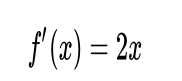

In [71]:
# we have two parameters, and . We store both of these parameters in an array called theta. First, we initialize theta with zeros, as follows:
theta = np.zeros(2)
print (theta)

[0. 0.]


The theta[0] function represents the value of m , while the theta[1] function represents the values of b. 

### Defining the loss function 

The **Mean  squared error(MSE) of regression is given as follows: 

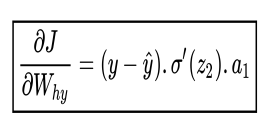

Here, N is the number of training samples, Y is the actual value, and Y' is the predicted value.

Let's define the loss function: 

In [72]:
def loss_function(data,theta): 
    m = theta[0]
    b = theta[1]
    loss = 0
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        y_hat = (m*x + b)
        loss = loss + ((y - (y_hat)) ** 2)
        mse = loss / float(len(data))
        return mse

When we feed our randomly initialized 'data' and model parameter, 'theta', 'loss_function' returns the mean squared loss, as follows:

In [73]:
loss_function(data, theta)

0.001750534631164594

### Computing the gradients of the loss function

The gradients of the loss function, J, with respect to the parameter m, are given as follows:

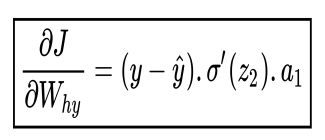

The gradients of the loss function, J, with respect to the parameter b, are given as follows:

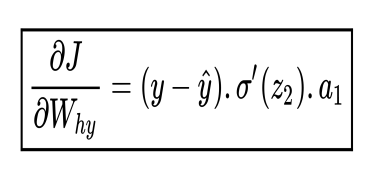

In [74]:
# We define a function called compute_gradients, which takes the parameters, data and theta as input and returns the computed gradients:
def compute_gradients(data, theta):
    gradients = np.zeros(2)
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]

    # we compute the gradient of the loss with respect to m, 
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b)) 
    # we compute the gradient of the loss with respect to b, 
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b)) 
        
    # We need to add epsilon to avoid division by zero error: 
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon)
    return gradients


When we feed our randomly initialized **data** and **theta** model parameter, the **compute_gradients** function returns the gradients with respect to m, that is, **dj/dm**, and gradients with respect to b, that is, **dj/db**, as follows:


In [75]:
compute_gradients(data,theta)


array([2.31079433e-04, 4.48592994e-05])

### Updating the model parameters

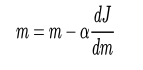

since we store **m** in theta[0] and **b** in theta[1]. 


Text(0.5, 1.0, 'Gradient Descent')

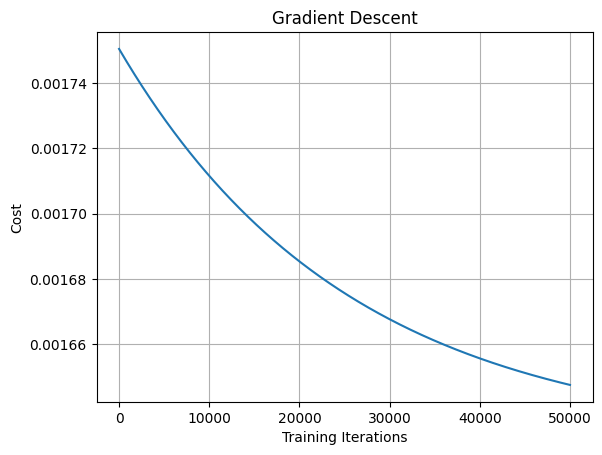

In [76]:
num_iterations = 50000
lr = 1e-2  # learning rate 
loss = []  # loss for storing loss on every iteration
theta = np.zeros(2)
for t in range(num_iterations):
#compute gradients
    gradients = compute_gradients(data, theta)
#update parameter
    theta = theta - (lr*gradients)
#store the loss
    loss.append(loss_function(data,theta))


# We need to plot the loss (Cost) function:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')


#The following plot shows how the loss (**Cost**) decreases over the training iterations:

Thus, we learned that gradient descent can be used to find the optimal
parameters of the model, which we can then use to minimize the loss

## Gradient Descent versus Stochastic Gradient Descent(SGD)

Stochastic gradient descent (SGD) is use to update the parameters of the model after iterating through every single data point in training set. 

When we have a huge dataset, by using the vanilla gradient descent method, we update the parameters only after iterating through all the data points in that huge dataset.

We perform the parameter update for each epoch as follows:

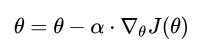



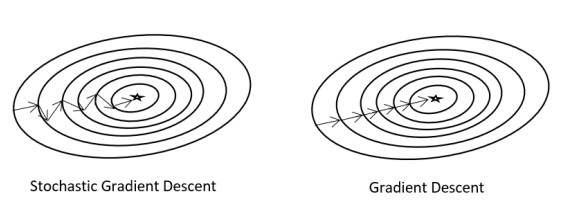

The following diagram shows the contour plot of SGD and mini-batch gradient descent:

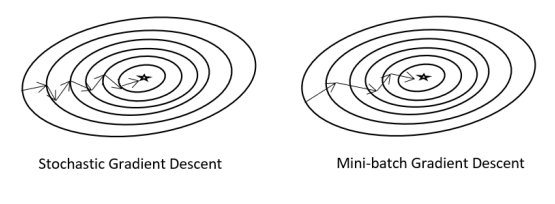 

Here are the differences between these types of gradient descent in a nutshell: 

- **Gradient descent:** Updates the parameters of the model after iterating through all the data points in the training set
- **Stochastic gradient descent:** Updates the parameter of the model after iterating through every single data point in the training set
- **Mini-batch gradient descent:** Updates the parameters of the model after iterating n number of data points in the training set


The code for mini-batch gradient descent is as follows:

In [77]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 1000):
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
    for t in range(num_iterations):
            sample_size = random.sample(range(len(data)), minibatch_size)
            np.random.shuffle(data) 
            sample_data = data[0:sample_size[0], :]
            grad = compute_gradients(sample_data, theta)
            theta = theta - (lr * grad)
    return theta

## Momentum-based Gradient Descent
In this section, we will learn about two new variants of gradient descent, called **momentum** and Nesterov accelerated gradient.

### Gradient descent with momentum
We have a problem with SGD and mini-batch gradient descent due to the oscillations in the parameter update. It is making a gradient step toward one direction, and then taking a different direction, and so on, until it reaches convergence.

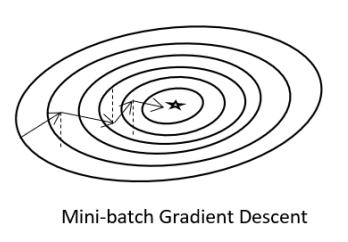

This oscillation occurs because, since we update the parameters after iterating every n number of data points, the direction of the update will have some variance, and this leads to oscillations in every gradient step.

To alleviate this, we'll introduce a new technique called **momentum**. We basically take a fraction of the parameter update from the previous gradient step and add it to the current gradient step. Here, the momentum keeps our gradient moving toward the direction that leads to convergence.


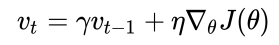

 In the preceding equation, "Vt" is called velocity, and it accelerates gradients in the direction that leads to convergence. It reduces oscillations in an irrelevant direction by adding a fraction of a parameter update from the previous step to the current step.

Thus, the parameter update equation with momentum is expressed as follows: 

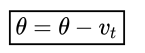

In [78]:
# Now, let's look at the implementation of momentum
# First, we define the momentum function, as follows:
def momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
    # Then, we initialize vt with zeros:
    vt = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        #Now, we compute gradients with respect to theta:
        gradients = compute_gradients(data, theta)
        # Next, we update vt to be Vt = Yvt-1+ n▼0J(0):
        vt = gamma * vt + lr * gradients
        # Now, we update the model parameter:
        theta = theta - vt
    return theta

### Nesterov accelerated gradient
 When the value of momentum is high while we are near to attaining convergence, then the momentum actually pushes the gradient step high and it might miss out on the actual minimum value as shown below:

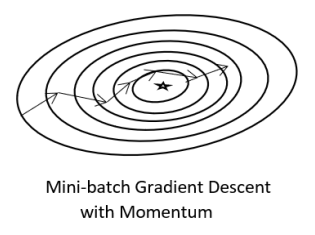

To overcome this, Nesterov introduced a new method called **Nesterov
accelerated gradient (NAG)**.

Here, we calculate gradients at the position where the momentum would take us to, and we call that position the lookahead position.

we can rewrite our vt equation according to NAG as follows:

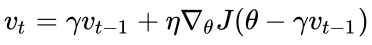

We update our parameter as follows:

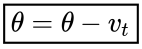



In [79]:
# The Nesterov accelerated method is implemented as follows:

# First, we define the NAG function:
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
    vt = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        # Now, we need to compute the gradients
        gradients = compute_gradients(data, theta - gamma * vt)
        vt = gamma * vt + lr * gradients
        # Now, we update the model parameter:
        theta = theta - vt
    return theta


## Adaptive Methods of Gradient Descent



In this section, we will learn about several adaptive versions of gradient descent.

**Setting a learning rate adaptively using Adagrad**

**Adagrad** (short for adaptive gradient) adaptively sets the learning rate according to a parameter.

The gradient of a parameter,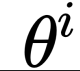,
at an iteration, , can be represented as follows:

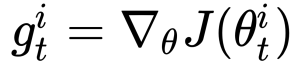

Therefore, we can rewrite our update equation with y as the gradient notation as follows:

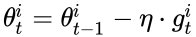

for every iteration, t, to update a parameter, 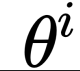, we divide the learning rate by the sum of squares of all previous gradients of the parameter, 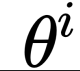, as follows:

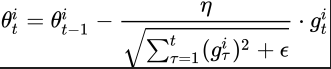

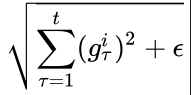

Here, implies the sum of squares of all previous gradients of the parameter 

The sum, 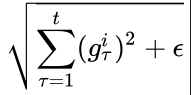, actually scales our learning rate. That is, when the sum of the squared past gradients has a high value, we are basically dividing the learning rate by a high value, so our learning rate will become less. This implies that the learning rate is inversely proportional to the sum of the squares of all the previous gradients of the parameter.

Here, our update equation is expressed as follows:

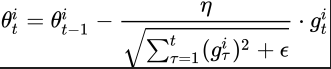

In a nutshell, in Adagrad, we set the learning rate to a low value when the previous gradient value is high, and to a high value when the past gradient value is lower.



In [80]:
# The code for the Adagrad algorithm is given as follows.
# First, define the AdaGrad function:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 10000):
    gradients_sum = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        # Now, we calculate the sum of the gradients squared:
        gradients_sum += gradients ** 2
        # Afterward, we compute the gradient updates:
        gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
        # Now, update the theta model parameter
        theta = theta - (lr * gradient_update)
    return theta

### Doing away with the learning rate using Adadelta
Adadelta is an enhancement of the Adagrad algorithm. In Adagrad, we noticed the problem of the learning rate diminishing to a very low number. In Adadelta, instead of taking the sum of all the squared past gradients, we can set a window of size W and take the sum of squared past gradients only from that window. If W is the window size, then our parameter update equation becomes the following:

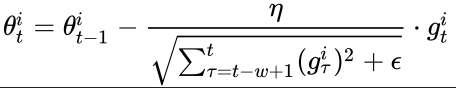

However, the problem is that, although we are taking gradients only from within a window, W, squaring and storing all the gradients from the window in each iteration is inefficient. So, instead of doing that, we can take the running average of gradients.

We compute the running average of gradients at an iteration, t, by
adding the previous running average of gradients, and current
gradients:

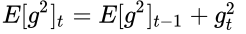

Instead of just taking the running average, we take the exponentially decaying running average of gradients, as follows:

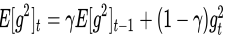 

Let's understand the Adadelta algorithm by implementing it.






In [81]:
# First, we define the AdaDelta function:
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5, num_iterations = 1000):
    # running average of gradients
    E_grad2 = np.zeros(theta.shape[0])
    # running average of parameter update
    E_delta_theta2 = np.zeros(theta.shape[0])
    # For every iteration, we perform the following steps:
    for t in range(num_iterations):
        # Now, we need to compute the gradients with respect to theta:
        gradients = compute_gradients(data, theta)
        # Then, we can compute the running average of gradients:
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
        # Here, we will compute delta_theta, that is, 
        delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 + epsilon)) * gradients
        # Now, we can compute the running average of the parameter update, 
        E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta **2))
        # Next, we will update the parameter of the model, theta, so that it's
        theta = theta + delta_theta
    return theta


### Overcoming the limitations of Adagrad using RMSProp
Similar to Adadelta, RMSProp was introduced to combat the decaying learning rate problem of Adagrad. So, in RMSProp, we compute the exponentially decaying running average of gradients as follows:

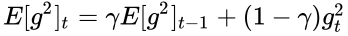

Instead of taking the sum of the square of all the past gradients, we use this running average of gradients. This means that our update equation becomes the following:

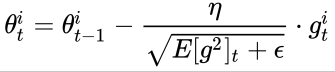

It is recommended to assign a value of learning to 0.9. Now, we will learn how to implement RMSProp in Python.


In [82]:
# First, we need to define the RMSProp function:
def RMSProp(data, theta, lr = 1e-2, gamma = 0.9, epsilon = 1e-6, num_iterations =1000):
    E_grad2 = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        # Then, we compute the gradients with respect to theta:
        gradients = compute_gradients(data, theta)
        # Next, we compute the running average of the gradients, that is, 
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
        # Now, we update the parameter of the model, theta,
        theta = theta - (lr / (np.sqrt(E_grad2 + epsilon)) * gradients)
    return theta


### Adaptive moment estimation
Adaptive moment estimation, known as Adam for short, is one of the most popularly used algorithms for optimizing a neural network. While reading about RMSProp, we learned that we compute the running average of squared gradients to avoid the diminishing learning rate problem:

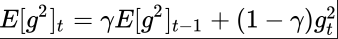

The final updated equation of RMSprop is given as follows:

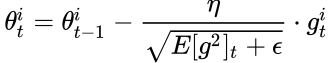

Similar to this, in Adam, we also compute the running average of the squared gradients. The running average of gradients is given as follows:

Our final update equation is given as follows:

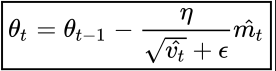

Now, let's understand how to implement Adam in Python.


In [83]:
# First, let's define the Adam function, as follows:
def Adam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):
    # Then, we initialize the first moment, mt, and the second moment, vt, with zeros:
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    # For every iteration, we perform the following steps:
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        mt_hat = mt / (1. - beta1 ** (t+1))
        vt_hat = vt / (1. - beta2 ** (t+1))
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
    return theta


### Adamax – Adam based on infinity-norm
To better understand the Adamax algorithm, let's code it, step by step:

In [84]:
# First, we define the Adamax function, as follows:
def Adamax(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 1000):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    # For every iteration, we perform the following steps:
    for t in range(num_iterations):
        # Now, we can compute the gradients with respect to theta, as follows:
        gradients = compute_gradients(data, theta)
        # Then, we compute the first moment, mt
        mt = beta1 * mt + (1. - beta1) * gradients
        # Next, we compute the second moment, vt, as
        vt = np.maximum(beta2 * vt, np.abs(gradients))
        # Now, we can compute the bias-corrected estimate of mt;
        mt_hat = mt / (1. - beta1 ** (t+1))
        # Update the model parameter, theta, so that it's
        theta = theta - ((lr / (vt + epsilon)) * mt_hat)
    return theta

### Adaptive moment estimation with AMSGrad
One problem with the Adam algorithm is that it sometimes fails to attain optimal convergence, or it reaches a suboptimal solution. To resolve this issue, the authors of AMSGrad made a small change to the Adam algorithm. In AMSGrad, we use a slightly modified version of vt. Instead of using directly, we take the maximum value of vt until the previous step, as follows:

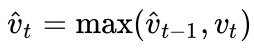

So, our final update equation becomes the following:

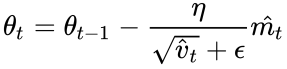

Now, let's understand how to code AMSGrad in Python:

In [85]:
# First, we define the AMSGrad function, as follows:
def AMSGrad(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6,num_iterations = 1000):
    # Then, we initialize the first moment, mt, the second moment, vt, and the modified version of vt, that is, vt_hat, with zeros, as follows:
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    vt_hat = np.zeros(theta.shape[0])
    # For every iteration, we perform the following steps:
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        # Then, we compute the first moment, mt,
        mt = beta1 * mt + (1. - beta1) * gradients
        # Next, we update the second moment, vt,
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        # Instead of using directly, we take the maximum value of until the previous step.
        vt_hat = np.maximum(vt_hat,vt)
        # Here, we will compute the bias-corrected estimate of mt, that is, 
        mt_hat = mt / (1. - beta1 ** (t+1))
        # Now, we can update the model parameter, theta, so that it's
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
    return theta


### Nadam – adding NAG to ADAM
Nadam is another small extension of the Adam method. As the name suggests, here, we incorporate NAG into Adam. Our final update equation becomes the following:

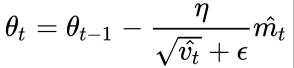

Now let's see how we can implement the Nadam algorithm in Python.


In [86]:
# First, we define the nadam function:
def nadam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 500):
    # Then, we initialize the first moment, mt, and the second moment, vt, with
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    # Next, we set beta_prod to 1:
    beta_prod = 1
    for t in range(num_iterations):
        # Then, we compute the gradients with respect to theta:
        gradients = compute_gradients(data, theta)
        # Afterward, we compute the first moment, mt:
        mt = beta1 * mt + (1. - beta1) * gradients
        # Now, we can update the second moment, vt, so that it is:
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        # Now, we compute beta_prod;
        beta_prod = beta_prod * (beta1)
        # Next, we compute the bias-corrected estimate of mt so that it is:
        mt_hat = mt / (1. - beta_prod)
        # Then, we compute the bias-corrected estimate of gt so that it is:
        g_hat = grad / (1. - beta_prod)
        # From here, we compute the bias-corrected estimate of vt so that it's
        vt_hat = vt / (1. - beta2 ** (t))
        # Now, we compute mt_tilde so that it is:
        mt_tilde = (1-beta1**t+1) * mt_hat + ((beta1**t)* g_hat)
        # Finally, we update the model parameter, theta, by using
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
    return theta



### Conclusion 

In this chapter, we covered key optimization techniques used in machine learning. We began by understanding convex and non-convex functions, followed by gradient descent for minimizing loss functions. We explored variations like stochastic gradient descent (SGD) and mini-batch SGD. Next, we learned how momentum and Nesterov momentum improve convergence. Adagrad adjusts the learning rate based on update frequency, while Adadelta eliminates the need for a fixed learning rate. Finally, Adam combines first and second momentum estimates for gradient updates.